In [3]:
import numpy as np
from scipy.special import comb, perm
from itertools import permutations,accumulate,combinations
import matplotlib.pyplot as plt
import random
import qutip
from multiprocessing import Pool
%matplotlib inline

In [54]:
%%time

N=6
state1=[[1,1]]*int(N/2)
# print(state1)
state2=[[1,-1]]*int(N/2)
state2.extend(state1)

def dirproduct(s):
    p=1
    for state in s:
        p=np.kron(p,state)
    return p


me=np.unique(list(permutations(state2)),axis=0)
finalstate=0
for s in me:
    p=1
    for state in s:
        p=np.kron(p,state)
    finalstate+=p
print(finalstate)


# operator=np.array([[1,1],[1,-1]])
# whoper=1
# for i in range(N):
#     whoper=np.kron(whoper,operator)

# transferstate=np.dot(whoper,finalstate)
# transferstatepro=transferstate**2/sum(transferstate**2)
finalstatepro=finalstate**2/np.sum(finalstate**2)

[ 20   0   0  -4   0  -4  -4   0   0  -4  -4   0  -4   0   0   4   0  -4
  -4   0  -4   0   0   4  -4   0   0   4   0   4   4   0   0  -4  -4   0
  -4   0   0   4  -4   0   0   4   0   4   4   0  -4   0   0   4   0   4
   4   0   0   4   4   0   4   0   0 -20]
CPU times: user 12.4 ms, sys: 6.89 ms, total: 19.3 ms
Wall time: 21.5 ms


In [53]:
%%time
#result=[]

N=6
state1=[[1,1]]*int(N/2)
# print(state1)
state2=[[1,-1]]*int(N/2)
state2.extend(state1)
me=np.unique(list(permutations(state2)),axis=0)

def dirproduct(s):
    p=1
    for state in s:
        p=np.kron(p,state)
    return p

pool = Pool(processes=20)

finalstate=0
res = pool.map(dirproduct, me)
# res.wait()
# if res.ready():  # 进程函数是否已经启动了
#     if res.successful():  # 进程函数是否执行成功
#         for state in res.get():
#             finalstate+=state# 进程函数返回值
            
for state in res:
        finalstate+=state
# finalstate=0
# for s1 in res:
#     finalstate+=s1.get()

print(finalstate)
finalstatepro=finalstate**2/np.sum(finalstate**2)
print(finalstatepro)

[ 20   0   0  -4   0  -4  -4   0   0  -4  -4   0  -4   0   0   4   0  -4
  -4   0  -4   0   0   4  -4   0   0   4   0   4   4   0   0  -4  -4   0
  -4   0   0   4  -4   0   0   4   0   4   4   0  -4   0   0   4   0   4
   4   0   0   4   4   0   4   0   0 -20]
[ 0.3125  0.      0.      0.0125  0.      0.0125  0.0125  0.      0.
  0.0125  0.0125  0.      0.0125  0.      0.      0.0125  0.      0.0125
  0.0125  0.      0.0125  0.      0.      0.0125  0.0125  0.      0.
  0.0125  0.      0.0125  0.0125  0.      0.      0.0125  0.0125  0.
  0.0125  0.      0.      0.0125  0.0125  0.      0.      0.0125  0.
  0.0125  0.0125  0.      0.0125  0.      0.      0.0125  0.      0.0125
  0.0125  0.      0.      0.0125  0.0125  0.      0.0125  0.      0.
  0.3125]
CPU times: user 104 ms, sys: 267 ms, total: 371 ms
Wall time: 405 ms


[-3. -2. -1.  0.  1.  2.  3.]
[0.3125, 0.0, 0.18750000000000006, 0.0, 0.18750000000000006, 0.0, 0.3125]
CPU times: user 103 ms, sys: 161 ms, total: 264 ms
Wall time: 394 ms


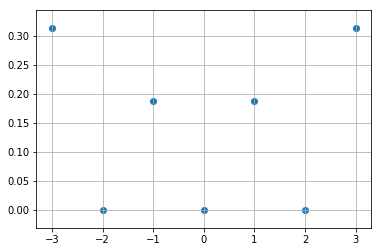

In [48]:
%%time
st=[]
for i in range(2**N):
    t=np.array(list(str(bin(2**N-1-i))[2:]),dtype='int')
    st.append(np.sum(t)-N/2)

stuni=np.unique(st)
print(stuni)
prop=[]
for Jz in stuni:
    prop.append(np.sum(finalstatepro[st==Jz]))

print(prop)
plt.grid(True)
plt.scatter(stuni,prop)

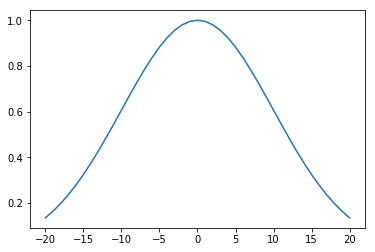

In [21]:
i=np.linspace(-20,20,41)
a=1
plt.plot(i,np.exp(-(i*a-0)**2/(2*(10*a)**2)))

In [43]:
L=50
sites=np.linspace(-L,L,2*L+1)
sigma0=3
initialstate=np.zeros(2*L+1)#np.exp(-(sites-0)**2/(2*sigma0**2))
#initialstate.put(L-np.arange(-10,11),1)
initialstate.put(50,1)
initialstate=initialstate/np.sqrt(np.sum(initialstate**2))
initialstate=qutip.Qobj(initialstate)
#print(initialstate)

In [57]:
V=np.diag(0.5*(sites))
#V=np.diag(1*(sites))
H=-np.eye(2*L+1,k=1)-np.eye(2*L+1,k=-1)+V
H=qutip.Qobj(H)

In [58]:
T=30
tlist=np.linspace(0,T,1000)
x=qutip.mesolve(H, initialstate, tlist, [],options=qutip.Options(nsteps=10000))

(1000, 101)


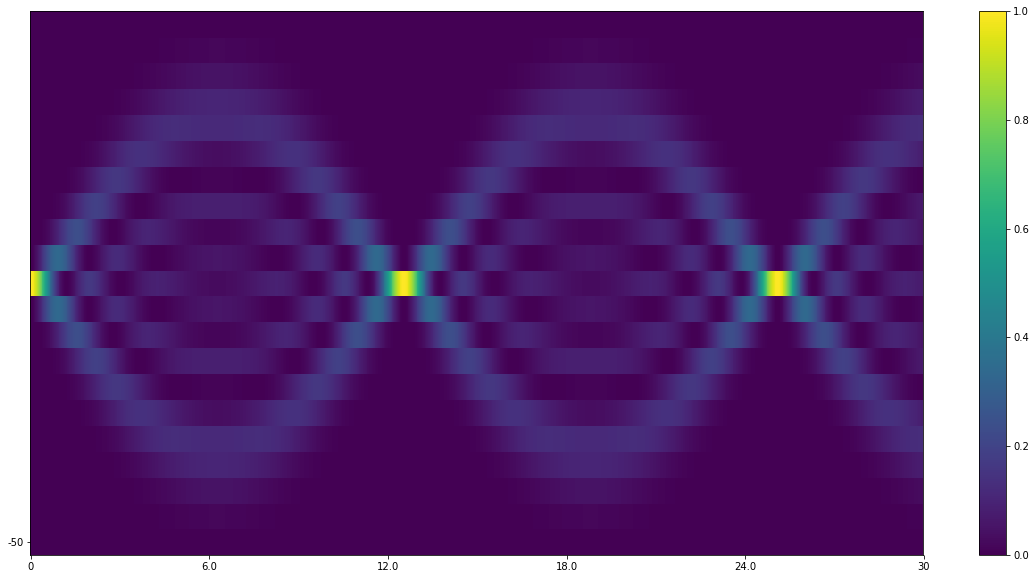

In [59]:
st=x.states
picd=[]
for everystate in st:
    s=np.abs(everystate.full())**2
    picd.append(s.reshape((2*L+1,)))
picd=np.array(picd)
print(picd.shape)
plt.figure(figsize=(20,10))
plt.xticks(np.linspace(0.5,1000.5,6),[0,1*T/5,2*T/5,3*T/5,4*T/5,T])
plt.yticks(np.linspace(0.5,2*L+0.5,5),[-L,'',0,'',L])
plt.pcolor(picd.transpose()[40:61,:])
plt.colorbar()

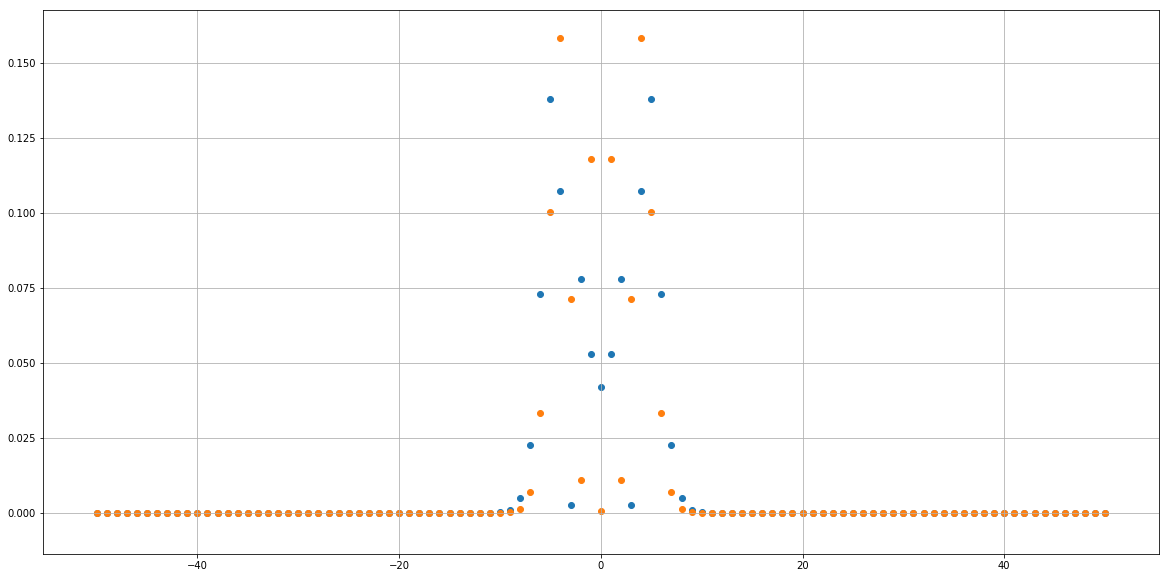

In [62]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.scatter(sites,picd.transpose()[:,300])
plt.scatter(sites,picd.transpose()[:,100])

In [50]:
np.diag(0.1*(sites)**2)

array([[ 2.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.9,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.9,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1.6,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  2.5]])

In [110]:
np.linspace(0,100,5)

array([   0.,   25.,   50.,   75.,  100.])

In [150]:
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [212]:
s=np.zeros(2*L+1)

In [213]:
s.put(L+np.arange(-3,4), 1)

In [214]:
s

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [210]:
np.arange(-3,3)

array([-3, -2, -1,  0,  1,  2])

In [211]:
L+np.arange(-3,4)

array([ 7,  8,  9, 10, 11, 12, 13])

In [1]:
(1+0.2/12)**12-1

0.21939108490523163